In [63]:
#primero importamos librerias necesarias
import pandas as pd
import numpy as np
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
###
import seaborn as sb

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [64]:
#primer dataset, correspondiende al crecimiento de población de distintos paises, por año
df1 = pd.read_csv("Datasets/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv") 
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,NaN
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898476,1.965751,2.029893,2.090248,2.147567,...,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,NaN
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.393363,1.383629,1.256555,0.973962,0.617544,...,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,NaN
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,NaN
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,NaN,6.941532,6.692697,6.559522,6.241511,5.998800,...,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,NaN,1.986474,2.857337,2.777956,2.702867,2.631731,...,0.859067,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.157992,NaN
260,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,NaN,1.450869,1.484101,1.506678,1.515090,1.515578,...,2.779988,2.757339,2.716520,2.654141,2.578072,2.498247,2.424025,2.357023,2.300580,NaN
261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,NaN,2.453268,2.486399,2.514285,2.535788,2.552486,...,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617,NaN
262,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,NaN,3.001073,2.998554,3.004536,3.022485,3.049879,...,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373,NaN


In [65]:
#ver si hay valores nulos en el df
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1960               True
                  ...  
2016               True
2017               True
2018               True
2019               True
2020               True
Length: 65, dtype: bool

In [66]:
#vemos que hay valores nulos en todas las columnas
# cantidad de valores nulos por columnas
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2016                2
2017                2
2018                2
2019                2
2020              264
Length: 65, dtype: int64

In [67]:
# borrar de df1 las columnas correspondientes a los años anteriores a 2000 que es donde está mas incompleto
# y el año 2020 porque no tiene datos
# axis=1 significa que quiero dropear columnas
df1=df1.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df1=df1.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df1=df1.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df1=df1.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df1=df1.drop(['2020'],axis=1)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [68]:
# nos quedan los años del 2000 al 2019
# ver si aun quedan NaN en el df
df1.isnull().values.any()

True

In [69]:
# ver en que columnas están los NaN
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007               True
2008               True
2009               True
2010               True
2011               True
2012               True
2013               True
2014               True
2015               True
2016               True
2017               True
2018               True
2019               True
dtype: bool

In [70]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              1
2001              1
2002              1
2003              1
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
2012              2
2013              2
2014              2
2015              2
2016              2
2017              2
2018              2
2019              2
dtype: int64

In [71]:
#como solo hay 1 o 2 filas con valor NaN por columna, borramos las filas que tienen NaN en cualquier columna
df1 = df1.dropna()
df1
#pasamos de 264 filas en el df original a 262

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,-3.582128,0.067859,0.067931,0.067885,0.067839,0.067910,...,0.803249,0.859067,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.157992
260,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,2.842719,2.883516,2.889575,2.892683,2.881947,2.861969,...,2.795788,2.779988,2.757339,2.716520,2.654141,2.578072,2.498247,2.424025,2.357023,2.300580
261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,1.409029,1.333293,1.263918,1.223839,1.217777,1.237753,...,1.455280,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617
262,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,2.679439,2.617614,2.580520,2.564828,2.577369,2.611388,...,2.914663,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373


In [72]:
#sacamos columnas que no sirven
df1_clean=df1.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df1_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [73]:
#hacemos un melt para poder mergear y hacer la correlacion luego
df1_melted = pd.melt(df1_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df1_melted

,Country Name,Fecha,Crecimiento porcentual
0,Aruba,2000,2.055027
1,Afghanistan,2000,2.975053
2,Angola,2000,3.277204
3,Albania,2000,-0.637357
4,Andorra,2000,1.572166
...,...,...,...
5235,Kosovo,2019,-0.157992
5236,"Yemen, Rep.",2019,2.300580
5237,South Africa,2019,1.338617
5238,Zambia,2019,2.892373


In [74]:
#realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,...,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189,NaN


In [75]:
# borrar de df2 las columnas correspondientes a los años anteriores a 2000 (porque tiene datos incompletos anteriores a esa fecha)
# y el año 2020 que eliminó de df1 porque no tiene datos, así quedan similares los dfs
df2=df2.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df2=df2.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df2=df2.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df2=df2.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df2=df2.drop(['2020'],axis=1)
df2=df2.drop(['Unnamed: 65'],axis=1) #borro esta xq es basura
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,8.832278,1.414118,11.229715,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


In [76]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df2.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              27
2001              21
2002              20
2003              15
2004              15
2005              14
2006              14
2007              13
2008              15
2009              14
2010              14
2011              14
2012              14
2013              14
2014              12
2015              13
2016              14
2017              14
2018              15
2019              20
dtype: int64

In [77]:
#todavia quedan muchas columnas con valores NaN, pensar si es más conveniente reducir los años aun mas o eliminar los paises
#con menos informacion disponible

In [78]:
#borramos todas las filas que tengan valor nulo
df2 = df2.dropna() 
df2
#pasamos de 262 filas a 226, pero igual consideramos que son suficientes paises para seguir con el analisis, se tendrá en cuenta a la hora
#de presentar los resultados que no fueron tomados en cuenta absolutamente todos los paises.

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,World,WLD,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.490553,2.029758,2.339500,3.170969,4.468110,4.067022,...,4.487379,3.334494,2.698410,2.870534,3.127884,3.164987,2.803578,3.386968,3.241819,2.561760
260,Samoa,WSM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.918794,6.939762,4.343996,4.515482,4.625001,4.156490,...,0.479159,4.173393,-4.088724,-0.418844,0.078245,4.272189,8.054160,1.044880,-2.063273,3.580626
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,...,3.039731,3.284168,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,...,10.298223,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785


In [79]:
df2_clean=df2.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df2_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,7.013670,7.371995,5.023262,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,5.264617,5.596795,6.166092,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,5.900084,5.979982,7.499970,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548


In [60]:
df2_melted = pd.melt(df2_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df2_melted

,Country Name,Fecha,Crecimiento porcentual
0,Africa Eastern and Southern,2000,3.143734
1,Africa Western and Central,2000,3.534805
2,Angola,2000,3.054624
3,Albania,2000,6.950036
4,Andorra,2000,3.528362
...,...,...,...
4555,World,2019,2.561760
4556,Samoa,2019,3.580626
4557,South Africa,2019,0.152583
4558,Zambia,2019,1.441785


In [89]:
#mergeamos los datasets por el country name y fecha
df_merged = df2_melted.merge(df1_melted, how='inner', left_on=('Country Name','Fecha'), right_on=('Country Name','Fecha'),suffixes=('_GDP', '_POP'))
print(df_merged.columns)
#como anteriormente borre filas de df1 con nulos, ya en el dataf mergeado no las tengo

Index(['Country Name', 'Fecha', 'Crecimiento porcentual_GDP',
       'Crecimiento porcentual_POP'],
      dtype='object')


In [90]:
#dataset final
df_merged

,Country Name,Fecha,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
0,Angola,2000,3.054624,3.277204
1,Albania,2000,6.950036,-0.637357
2,Andorra,2000,3.528362,1.572166
3,Arab World,2000,6.704940,2.152840
4,United Arab Emirates,2000,10.852704,5.510422
...,...,...,...,...
4515,World,2019,2.561760,1.074675
4516,Samoa,2019,3.580626,0.491829
4517,South Africa,2019,0.152583,1.338617
4518,Zambia,2019,1.441785,2.892373


In [91]:
corr_matrix=df_merged.corr(method='pearson')
corr_matrix

,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
Crecimiento porcentual_GDP,1.000000,0.145716
Crecimiento porcentual_POP,0.145716,1.000000


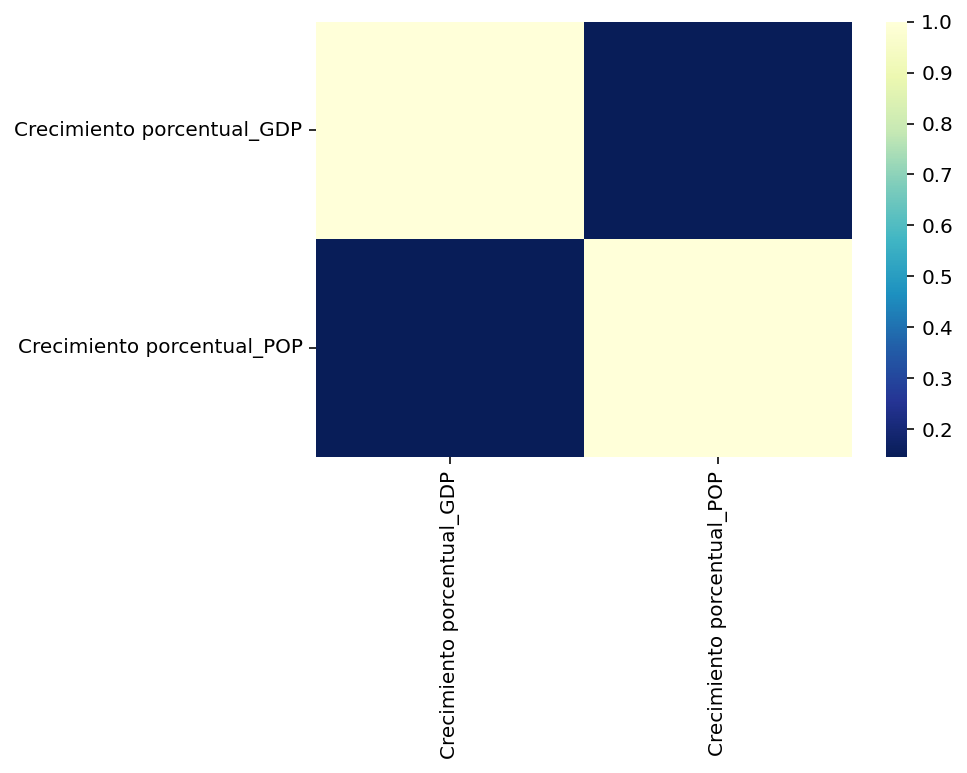

In [92]:
dataplot = sb.heatmap(corr_matrix, cmap="YlGnBu_r", annot=False)
mp.show()

In [ ]:
#cambiar nombre de variable a numero, dummie variable